<h1><b><u>Logistic Regression</u></b></h1>

Logistic regression is a fundamental statistical technique  used in machine learning for <b>`Classification tasks`</b>. Its particularly useful when predicting the probability of an event falling into one of two categories.<br>Example if you want to classify emails as spam or not spam,predicting customer churn etc.

Explanation of logistic regressionn in python:
<ol>
<li><b><u>Data</u></b>-Logistic regression works best with <i>dependent variable</i> that's categorical(binary)- yes/no,0/1.The independent variables can be numerical (e.g., age) or categorical (e.g., house type).

<li><b><u>The Sigmoid Function</u></b>- Unlike linear regression that predicts a continuous value, logistic regression uses a mathematical function called the <i>sigmoid function</i>(also known as the logistic function). This S-shaped function squishes the linear combination of independent variables (think of it as a weighted sum) into a probability value between 0 and 1.
<li><b><u>Interpretation</u></b>- The output from the logistic regression model is a probability. For example, a 0.8 value might indicate an 80% chance of belonging to category 1 and a 20% chance of belonging to category 2.
<li><b><u>Decision Threshold</u></b>- You can set a threshold (commonly 0.5) to classify data points. Anything above the threshold is predicted to be category 1, and anything below is category 2. This threshold can be adjusted based on the specific problem you're trying to solve.




In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Step 1: Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [20]:
#Step 2: Explore the dataset
print("Dataset head:")
print(X.head())
print("\nTarget distribution:")
print(y.value_counts())

Dataset head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

In [21]:
#Step 3: Preprocess the data
# (No preprocessing required for this dataset as it is already clean)


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Step 4: Train the logistic regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [24]:

# Step 5: Make predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of positive class


In [25]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [26]:
print("\nModel Accuracy:")
print(accuracy)



Model Accuracy:
0.956140350877193


In [27]:
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[39  4]
 [ 1 70]]


In [28]:
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [29]:
print("\nROC AUC Score:")
print(roc_auc)


ROC AUC Score:
0.9977071732721913


In [30]:
# Step 7: Compute Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
metrics_df = pd.DataFrame({
    'Class': data.target_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nPrecision, Recall, and F1-Score Table:")
print(metrics_df)



Precision, Recall, and F1-Score Table:
       Class  Precision    Recall  F1-Score
0  malignant   0.975000  0.906977  0.939759
1     benign   0.945946  0.985915  0.965517


#### Precision and recall are two crucial metrics used to evaluate the performance of a classification model, particularly in machine learning. They provide insights into different aspects of a model's effectiveness:
<ol>

<li><b>Precision:</b>

Focuses on: The correctness of positive predictions.
Answers the question: `"Out of all the data points the model classified as positive, how many were actually positive?"`
Calculation: Precision is calculated as the number of True Positives `(TP)` divided by the sum of True Positives `(TP)` and False Positives `(FP).`

<li><b>Recall:</b>

Focuses on: The completeness of positive predictions.
Answers the question: `"Out of all the actual positive data points, how many did the model correctly identify?"`
Calculation: Recall is calculated as the number of True Positives `(TP)` divided by the sum of True Positives `(TP)` and False Negatives `(FN).`


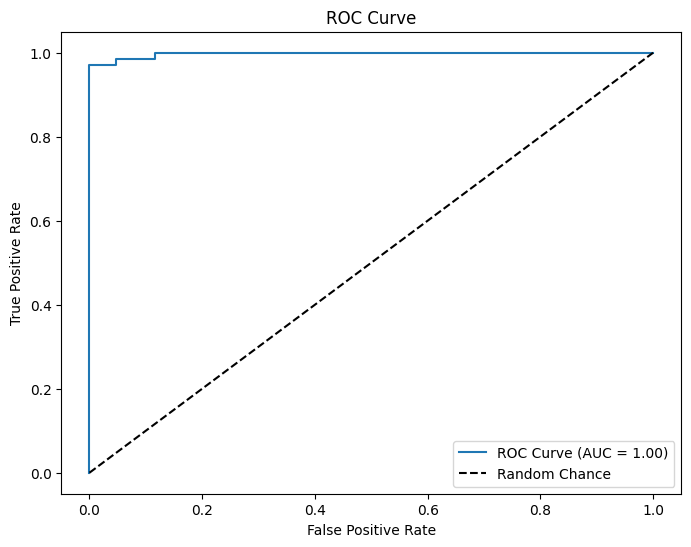

In [31]:
# Step 8: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

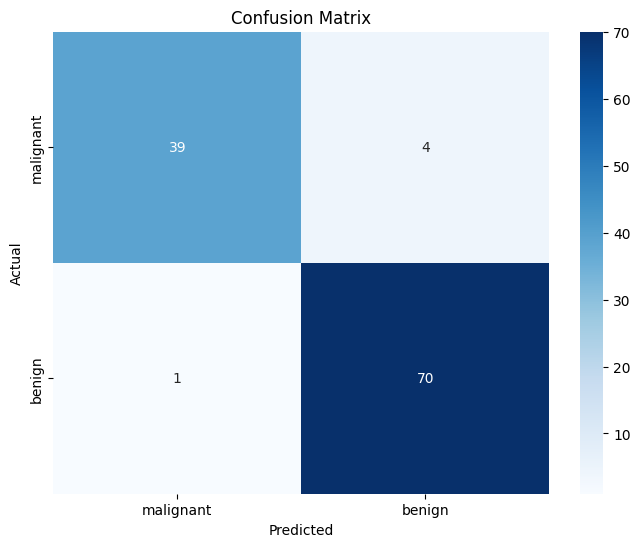

In [32]:
# Step 9: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Interpretation
print("Logistic Regression Interpretation:")
print("The coefficients of the logistic regression model indicate the relationship between the features and the log odds of the target variable.")
print("Model Coefficients:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")

print("\nThe sigmoid function converts the linear combination of features and their coefficients into a probability value between 0 and 1.")

Logistic Regression Interpretation:
The coefficients of the logistic regression model indicate the relationship between the features and the log odds of the target variable.
Model Coefficients:
mean radius: 0.9813
mean texture: 0.2254
mean perimeter: -0.3684
mean area: 0.0263
mean smoothness: -0.1574
mean compactness: -0.2279
mean concavity: -0.5274
mean concave points: -0.2840
mean symmetry: -0.2256
mean fractal dimension: -0.0359
radius error: -0.0963
texture error: 1.4017
perimeter error: -0.1661
area error: -0.0892
smoothness error: -0.0230
compactness error: 0.0531
concavity error: -0.0389
concave points error: -0.0323
symmetry error: -0.0324
fractal dimension error: 0.0125
worst radius: 0.0949
worst texture: -0.5157
worst perimeter: -0.0165
worst area: -0.0166
worst smoothness: -0.3121
worst compactness: -0.7538
worst concavity: -1.4254
worst concave points: -0.5117
worst symmetry: -0.7424
worst fractal dimension: -0.0990

The sigmoid function converts the linear combination of f